In [1]:
# Imports
import numpy as np
import pandas as pd

from gradient_aware_harmonisation.harmonise import harmoniser
from gradient_aware_harmonisation.utils import convert_to_timeseries
from gradient_aware_harmonisation.helpers import plotting

## Toy Example 1: Artificial data
### Create some data

In [2]:
# create some data
harmonisation_time = 3.0

x1 = np.arange(-2, 4., 0.01)
y1 = -16*x1

x2 = np.arange(2, 10, 0.01)
y2 = 0.5*x2 + x2**3

### Harmonise functions using `harmonise`

In [3]:
target_timeseries = convert_to_timeseries(x1, y1)
harmonisee_timeseries = convert_to_timeseries(x2, y2)

harmonised_timeseries = harmoniser(target_timeseries, harmonisee_timeseries, harmonisation_time=harmonisation_time, convergence_time=None)

### Plot results

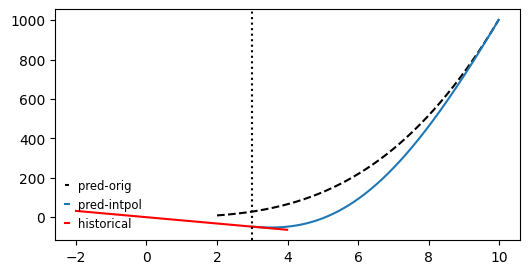

In [4]:
plotting(harmonisee_timeseries, target_timeseries, harmonised_timeseries, harmonisation_time, None)

## Toy Example 2: Use real timeseries data
### Read data from file

In [5]:
# read data from file
df = pd.read_csv("../../tests/test-data/monthly_co2_surface-flask.csv")
df2 = pd.read_csv("../../tests/test-data/monthly_co2_airs_nlis.csv")

# get aggregated CO2 value per year
dat0 = df[["year", "value"]].groupby(["year"]).agg({"value":"mean"}).reset_index()
dat1 = df2[["year", "value"]].groupby(["year"]).agg({"value":"mean"}).reset_index()

# select specific time sequence
dat0_short = dat0[(dat0["year"]<=2003) & (dat0["year"]>2000)]

### Preprocess data and run `harmonise`

In [11]:
# prepare data for input to harmonise
x = (list(dat0_short["year"]), list(dat1["year"]))
y = (list(dat0_short["value"]), list(dat1["value"]))

# select harmonization time point
harmonisation_time = 2003
convergence_time = 2007

# get timeseries
target_timeseries = convert_to_timeseries(dat0_short.year.values, dat0_short.value.values)
harmonisee_timeseries = convert_to_timeseries(dat1.year.values, dat1.value.values)

# harmonise timeseries at t0
harmonised_timeseries = harmoniser(target_timeseries, harmonisee_timeseries, harmonisation_time=harmonisation_time,
                                   convergence_time=None, bc_type="natural")
# harmonise timeseries at t0 and assure convergence at t1 (converge_t)
harmonised_timeseries2 = harmoniser(target_timeseries, harmonisee_timeseries, harmonisation_time=harmonisation_time,
                                    convergence_time=convergence_time, bc_type="natural")
# harmonise timeseries at t0 and assure convergence at t1 (converge_t)
harmonised_timeseries3 = harmoniser(target_timeseries, harmonisee_timeseries, harmonisation_time=harmonisation_time,
                                    convergence_time=convergence_time, bc_type="natural",
                                    interpolation_target="bias_corrected")


### Plot results

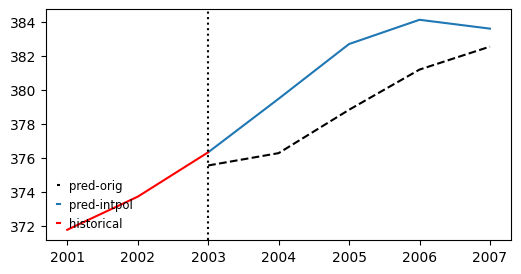

In [8]:
plotting(harmonisee_timeseries, target_timeseries, harmonised_timeseries, harmonisation_time, None)

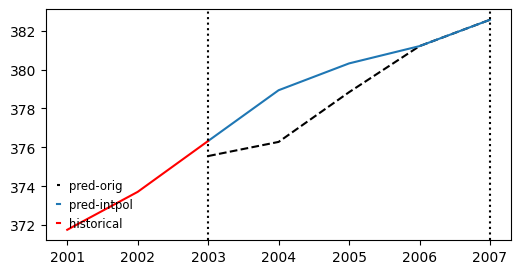

In [10]:
plotting(harmonisee_timeseries, target_timeseries, harmonised_timeseries2, harmonisation_time, convergence_time)

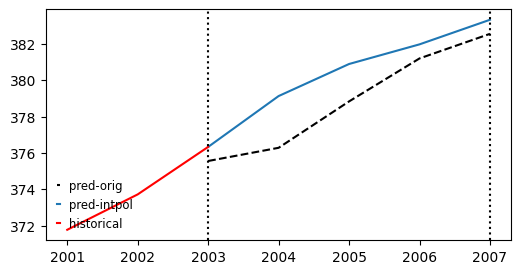

In [12]:
plotting(harmonisee_timeseries, target_timeseries, harmonised_timeseries3, harmonisation_time, convergence_time)